In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# missing data

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

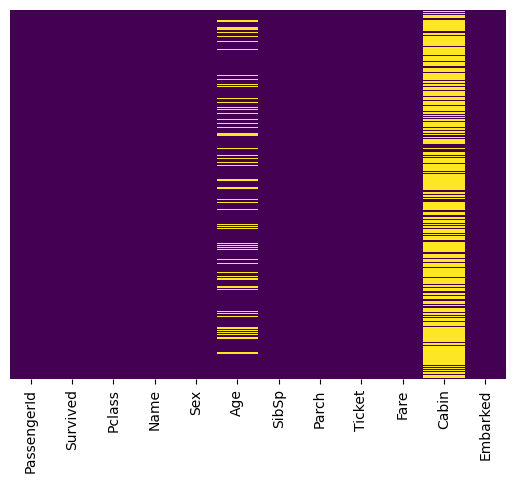

In [7]:
sns.heatmap(train.isnull(),yticklabels=False , cbar=False , cmap="viridis")

<Axes: >

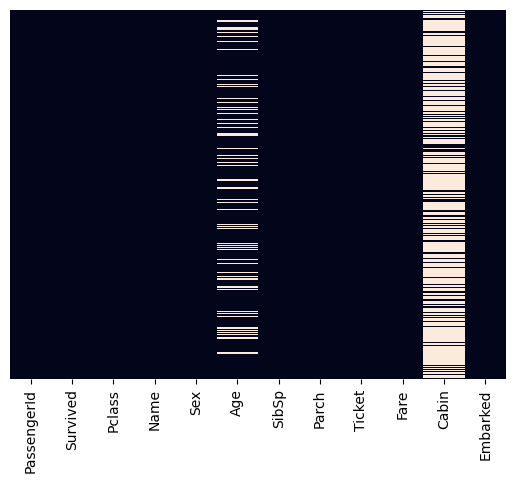

In [8]:
sns.heatmap(train.isnull(),yticklabels=False , cbar=False )

<Axes: xlabel='Survived', ylabel='count'>

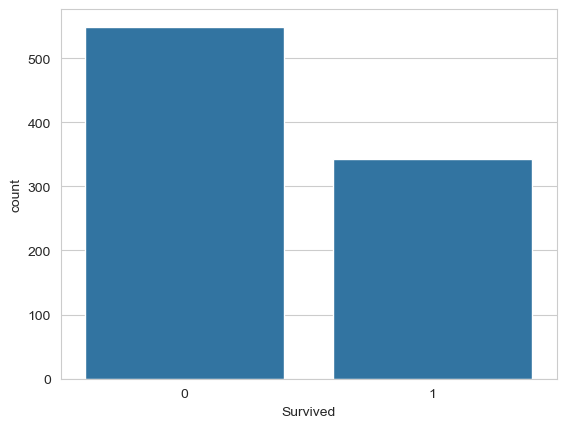

In [9]:
sns.set_style("whitegrid")
sns.countplot(data=train , x= 'Survived')

<Axes: xlabel='Survived', ylabel='count'>

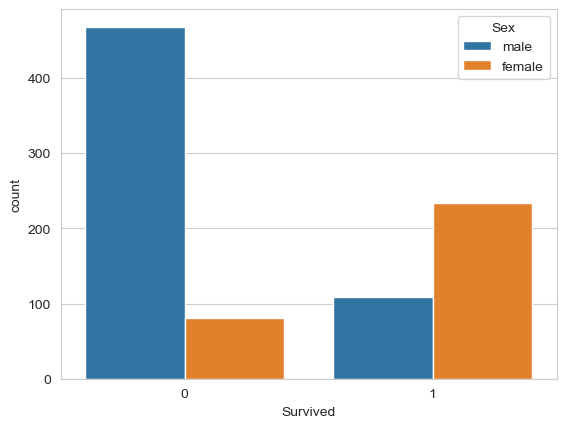

In [10]:
sns.set_style("whitegrid")
sns.countplot(data=train , x= 'Survived' , hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

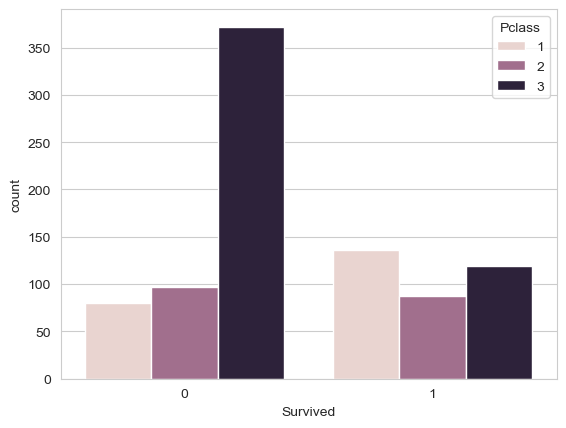

In [11]:
sns.set_style("whitegrid")
sns.countplot(data=train , x= 'Survived' , hue='Pclass')

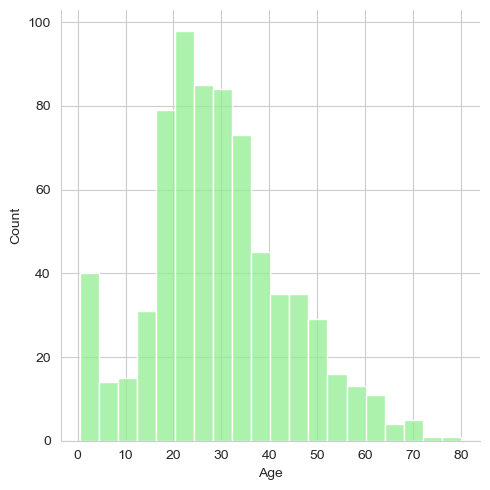

In [12]:
sns.displot(train['Age'].dropna() , color='lightgreen')

C:\Users\AYUSHI\AppData\Local\Temp\ipykernel_31132\895852937.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train , x= 'SibSp' , palette='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

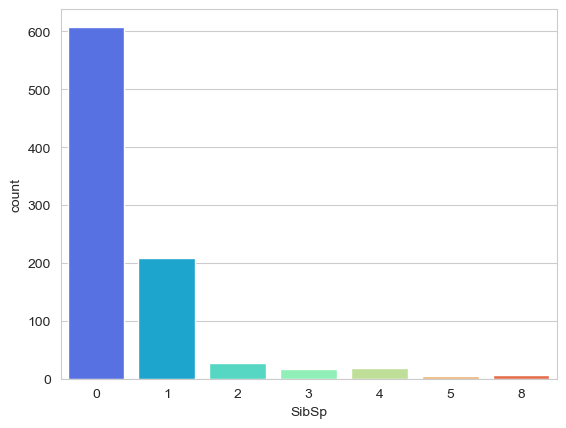

In [13]:
sns.countplot(data=train , x= 'SibSp' , palette='rainbow')

<Axes: >

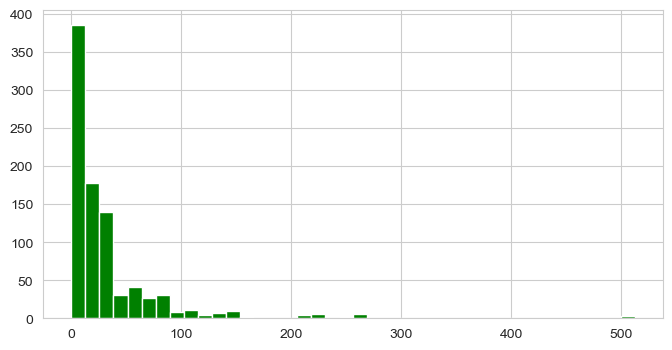

In [14]:
train['Fare'].hist(color= 'green', bins=40, figsize=(8,4))

<Axes: >

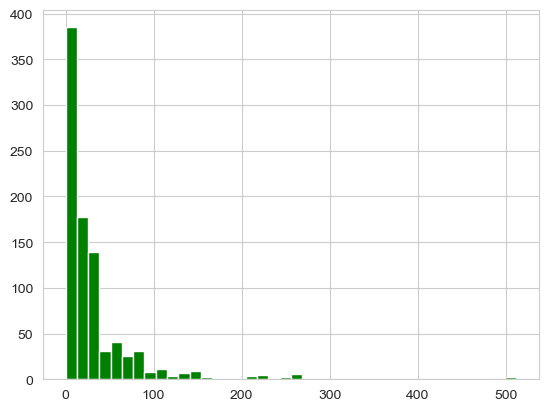

In [15]:
train['Fare'].hist(color= 'green' , bins= 40)

C:\Users\AYUSHI\AppData\Local\Temp\ipykernel_31132\1637861923.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= train, x= 'Pclass', y='Age' , palette='rainbow')


<Axes: xlabel='Pclass', ylabel='Age'>

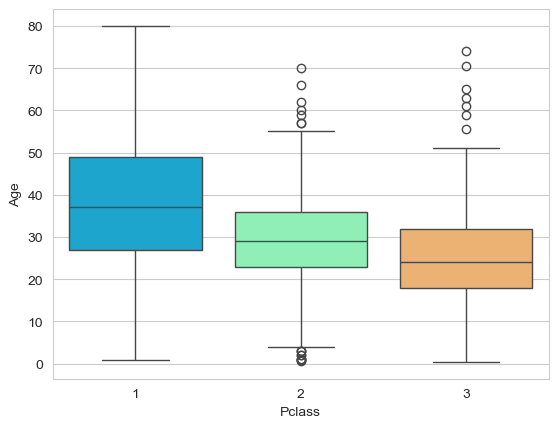

In [16]:
sns.boxplot(data= train, x= 'Pclass', y='Age' , palette='rainbow')

In [17]:
def input_age(cols):
    Age=cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 25
    else :
        return Age


### Apply this fucntion

In [18]:
train['Age']= train[['Age','Pclass']].apply(input_age,axis=1)

C:\Users\AYUSHI\AppData\Local\Temp\ipykernel_31132\41613378.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\AYUSHI\AppData\Local\Temp\ipykernel_31132\41613378.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass= cols[1]


<Axes: >

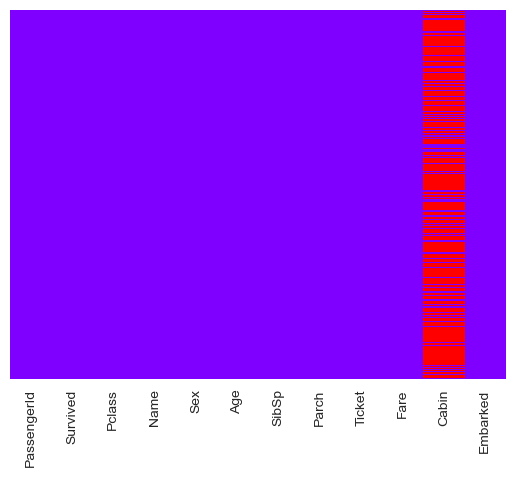

In [19]:
sns.heatmap(train.isnull(),yticklabels=False , cbar=False , cmap='rainbow')

In [21]:
train.fillna(0, inplace=True)
train.drop('Cabin', axis=1, inplace=True)

In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64